In [1]:
!pip uninstall scikit-learn -y

!pip install -U scikit-learn

Found existing installation: scikit-learn 1.2.1
Uninstalling scikit-learn-1.2.1:
  Successfully uninstalled scikit-learn-1.2.1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 34.8 MB/s eta 0:00:00


In [2]:
!pip install xgboost

!pip install lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [50]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns 
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LogisticRegression as LR
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import accuracy_score
from warnings import simplefilter
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold
from sklearn import tree
from sklearn import datasets
from sklearn.inspection import DecisionBoundaryDisplay
import random
import math
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
import lightgbm as ltb
import statistics

Question 1.1.1

In [4]:
mm = make_moons(n_samples = 1000,random_state=42, noise=0.3,shuffle=True)
X,Y = mm
print(X.shape)
print(Y.shape)

(1000, 2)
(1000,)


In [5]:
X

array([[-0.17186341,  0.59624885],
       [ 1.25328273, -0.26541353],
       [ 0.72322405,  0.2319425 ],
       ...,
       [ 1.77095705, -0.50943619],
       [-1.06177158,  0.006786  ],
       [ 0.76117231,  0.65196041]])

In [6]:
Y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

<function matplotlib.pyplot.show(close=None, block=None)>

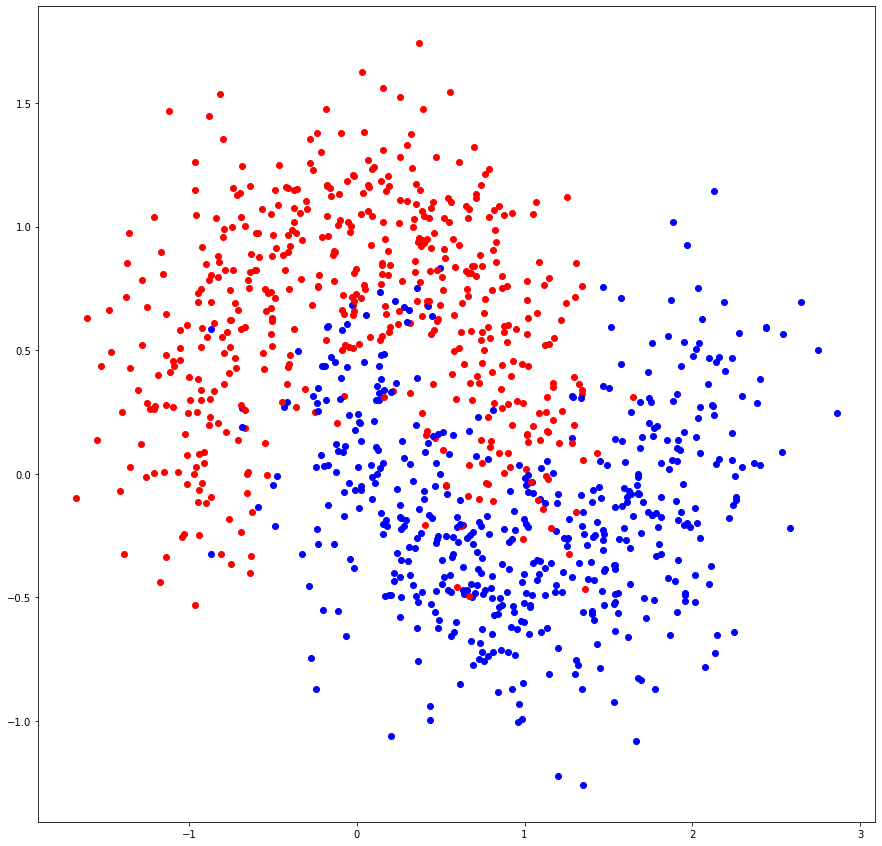

In [7]:
plt.figure(figsize=(15, 15))
for i in range(1000):
  if Y[i] == 0:
    plt.scatter(X[i,0],X[i,1],color = 'red')
  else:
    plt.scatter(X[i,0],X[i,1],color = 'blue')
plt.show

In [8]:
user_prompt = 0.25
user_enable = False

x_train,x_test,y_train,y_test = tts(X,Y,test_size=user_prompt,shuffle=user_enable)
print(x_test.shape)
print(x_train.shape)
print(y_test.shape)
print(y_train.shape)

(250, 2)
(750, 2)
(250,)
(750,)


Qestion 1.1.2

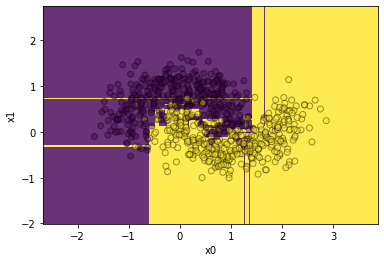

In [9]:
model1 = DTC()
model1.fit(x_train,y_train)
disp = DecisionBoundaryDisplay.from_estimator(model1, x_train, response_method="predict",xlabel='x0',alpha = 0.8, ylabel='x1',plot_method = 'pcolormesh',grid_resolution = 500)
disp.ax_.scatter(x_train[:, 0], x_train[:, 1], c=y_train,edgecolor="k",alpha = 0.4)

In [10]:
y_pred = model1.predict(x_test)
acc_1 = accuracy_score(y_test, y_pred)
print(acc_1)

0.904


The best value for max_depth is : 6


<function matplotlib.pyplot.show(close=None, block=None)>

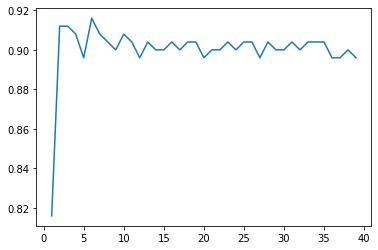

In [11]:
arr = []
for i in range(1,40):
  model_t = DTC(max_depth = i)
  model_t.fit(x_train,y_train)
  y_pred = model_t.predict(x_test)
  acc_t = accuracy_score(y_test, y_pred)
  arr.append(acc_t)
i = np.linspace(1,39,39)
m = arr.index(max(arr))+1
print('The best value for max_depth is :',m)
plt.plot(i,arr)
plt.show

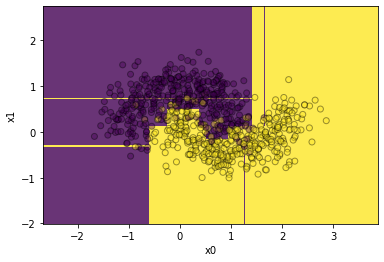

In [12]:
model1 = DTC(max_depth = m)
model1.fit(x_train,y_train)
disp = DecisionBoundaryDisplay.from_estimator(model1, x_train, response_method="predict",xlabel='x0',alpha = 0.8, ylabel='x1',plot_method = 'pcolormesh',grid_resolution = 500)
disp.ax_.scatter(x_train[:, 0], x_train[:, 1], c=y_train,edgecolor="k",alpha = 0.4)

In [13]:
y_pred = model1.predict(x_test)
acc_1 = accuracy_score(y_test, y_pred)
print(acc_1)

0.916


1Question 1.1.3

In [14]:
model2 = BaggingClassifier(estimator=DTC(max_depth = m))
model2.fit(x_train,y_train)
y_pred = model2.predict(x_test)
acc_2 = accuracy_score(y_test, y_pred)
print(acc_2)

0.912


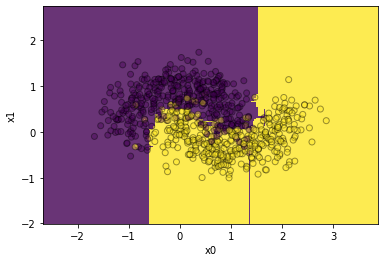

In [15]:
disp = DecisionBoundaryDisplay.from_estimator(model2, x_train, response_method="predict",xlabel='x0',alpha = 0.8, ylabel='x1',plot_method = 'pcolormesh',grid_resolution = 500)
disp.ax_.scatter(x_train[:, 0], x_train[:, 1], c=y_train,edgecolor="k",alpha = 0.4)

In [16]:
model3 = RandomForestClassifier()
model3.fit(x_train,y_train)
y_pred = model3.predict(x_test)
acc_3 = accuracy_score(y_test, y_pred)
print(acc_3)

0.92


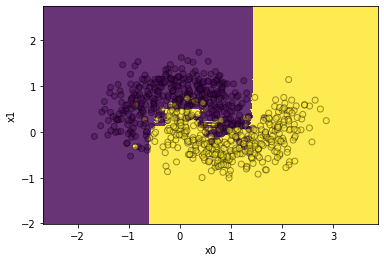

In [17]:
disp = DecisionBoundaryDisplay.from_estimator(model3, x_train, response_method="predict",xlabel='x0',alpha = 0.8, ylabel='x1',plot_method = 'pcolormesh',grid_resolution = 500)
disp.ax_.scatter(x_train[:, 0], x_train[:, 1], c=y_train,edgecolor="k",alpha = 0.4)

1.1.5

The best value for n_estimator is : 40


<function matplotlib.pyplot.show(close=None, block=None)>

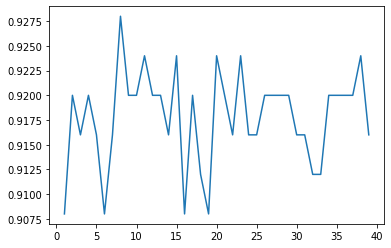

In [18]:
arr = []
for i in range(1,40):
  model_t = RandomForestClassifier(n_estimators = i*5)
  model_t.fit(x_train,y_train)
  y_pred = model_t.predict(x_test)
  acc_t = accuracy_score(y_test, y_pred)
  arr.append(acc_t)
i = np.linspace(1,39,39)
r = arr.index(max(arr))+1
print('The best value for n_estimator is :',r*5)
plt.plot(i,arr)
plt.show

The best value for n_estimator is : 25


<function matplotlib.pyplot.show(close=None, block=None)>

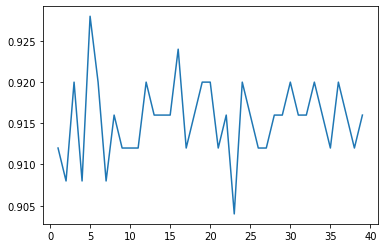

In [19]:
arr = []
for i in range(1,40):
  model_t = BaggingClassifier(estimator=DTC(max_depth = m),n_estimators = i*5)
  model_t.fit(x_train,y_train)
  y_pred = model_t.predict(x_test)
  acc_t = accuracy_score(y_test, y_pred)
  arr.append(acc_t)
i = np.linspace(1,39,39)
b = arr.index(max(arr))+1
print('The best value for n_estimator is :',b*5)
plt.plot(i,arr)
plt.show

In [99]:
class BaggingClassifierScratch:

  def __init__(self,n_estimators,classifier = None,n_samples = None):
    self.n_estimators = n_estimators
    self.classifier = classifier
    self.n_samples = n_samples
    self.list_estimators = []
    self.list_estimator_accuracies = []
  def fit_bag(self,x,y):
    max_samples = x.shape[0]
    if self.n_samples is None:
      self.n_samples = max_samples
    if self.classifier is None:
      self.classifier = DTC()
    for i in range(self.n_estimators):
      indices = np.random.randint(max_samples, size=self.n_samples)
      xx_train = x[indices]
      yy_train = y[indices]
      model = self.classifier
      model.fit(xx_train,yy_train)
      self.list_estimators.append(model)
  def predict_bag(self,x,y):
    self.xx_test = x
    self.yy_test = y
    self.predictions = []
    for j in range(len(self.list_estimators)):
      some_model = self.list_estimators[j]
      yy_pred = some_model.predict(self.xx_test)
      acc_est = accuracy_score(self.yy_test,yy_pred)
      self.list_estimator_accuracies.append(acc_est)
      self.predictions.append(yy_pred)
    self.ac_pred = []
    self.predictions = np.array(self.predictions)
    for i in range(self.predictions.shape[1]):
      self.ac_pred.append(statistics.mode(self.predictions[:,i]))
    return self.ac_pred

In [102]:
bcs = BaggingClassifierScratch(n_estimators = 10)
bcs.fit_bag(x_train,y_train)
y_pred = bcs.predict_bag(x_test,y_test)
print(accuracy_score(y_test,y_pred))

0.868


Question 2.1

In [20]:
model_adab = AdaBoostClassifier(n_estimators=100)
model_adab.fit(x_train,y_train)

AdaBoostClassifier(n_estimators=100)

Question 2.2

In [21]:
model_xgb = XGBClassifier(n_estimators=100, subsample = 0.7)
model_xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

Question 2.3

In [22]:
y_pred = model_adab.predict(x_train)
acc_train_ada = accuracy_score(y_train, y_pred)
y_pred = model_xgb.predict(x_train)
acc_train_xgb = accuracy_score(y_train, y_pred)
y_pred = model_adab.predict(x_test)
acc_test_ada = accuracy_score(y_test, y_pred)
y_pred = model_xgb.predict(x_test)
acc_test_xgb = accuracy_score(y_test, y_pred)
print("The acccuracy of AdaBoost Model on training data is:",acc_train_ada)
print("The acccuracy of AdaBoost Model on testing data is:",acc_test_ada)
print("The acccuracy of XGBoost Model on training data is:",acc_train_xgb)
print("The acccuracy of XGBoost Model on testing data is:",acc_test_xgb)

The acccuracy of AdaBoost Model on training data is: 0.9493333333333334
The acccuracy of AdaBoost Model on testing data is: 0.912
The acccuracy of XGBoost Model on training data is: 0.9946666666666667
The acccuracy of XGBoost Model on testing data is: 0.904


Question 2.4 and 2.5

2


<function matplotlib.pyplot.show(close=None, block=None)>

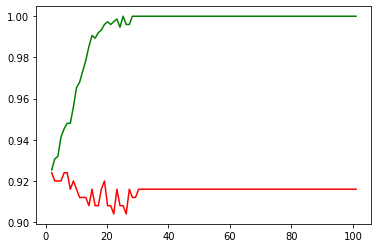

In [34]:
arr_train = []
arr_test = []
for i in range(2,101):
  model = ltb.LGBMClassifier(num_leaves = i,random_state = 1)
  model.fit(x_train,y_train)
  y_pred = model.predict(x_test)
  acc_lgbm = accuracy_score(y_test, y_pred)
  arr_test.append(acc_lgbm)
  y_pred = model.predict(x_train)
  acc_lgbm = accuracy_score(y_train, y_pred)
  arr_train.append(acc_lgbm)
i = np.linspace(2,101,99)
k = arr_test.index(max(arr_test)) + 2
print(k)
plt.plot(i,arr_test,color = 'red')
plt.plot(i,arr_train,color = 'green')
plt.show

1


<function matplotlib.pyplot.show(close=None, block=None)>

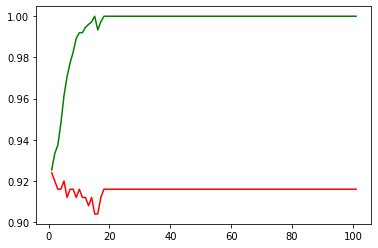

In [35]:
arr_train = []
arr_test = []
for i in range(1,101):
  model = ltb.LGBMClassifier(max_depth = i,random_state = 1)
  model.fit(x_train,y_train)
  y_pred = model.predict(x_test)
  acc_lgbm = accuracy_score(y_test, y_pred)
  arr_test.append(acc_lgbm)
  y_pred = model.predict(x_train)
  acc_lgbm = accuracy_score(y_train, y_pred)
  arr_train.append(acc_lgbm)
i = np.linspace(1,101,100)
k = arr_test.index(max(arr_test)) + 1
print(k)
plt.plot(i,arr_test,color = 'red')
plt.plot(i,arr_train,color = 'green')
plt.show

Question 2.7

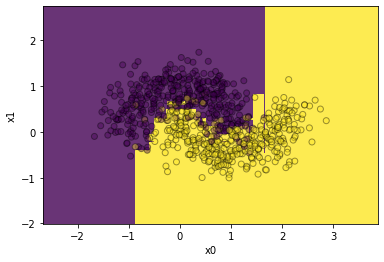

In [25]:
model_adab = AdaBoostClassifier(n_estimators=100)
model_adab.fit(x_train,y_train)
disp = DecisionBoundaryDisplay.from_estimator(model_adab, x_train, response_method="predict",xlabel='x0',alpha = 0.8, ylabel='x1',plot_method = 'pcolormesh',grid_resolution = 500)
disp.ax_.scatter(x_train[:, 0], x_train[:, 1], c=y_train,edgecolor="k",alpha = 0.4)

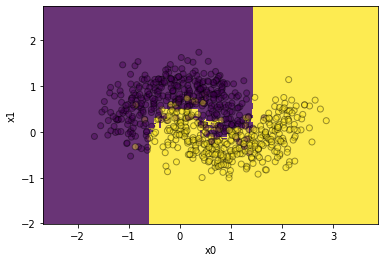

In [26]:
model_xgb = XGBClassifier(n_estimators=100, subsample = 0.7)
model_xgb.fit(x_train,y_train)
disp = DecisionBoundaryDisplay.from_estimator(model_xgb, x_train, response_method="predict",xlabel='x0',alpha = 0.8, ylabel='x1',plot_method = 'pcolormesh',grid_resolution = 500)
disp.ax_.scatter(x_train[:, 0], x_train[:, 1], c=y_train,edgecolor="k",alpha = 0.4)

0.924


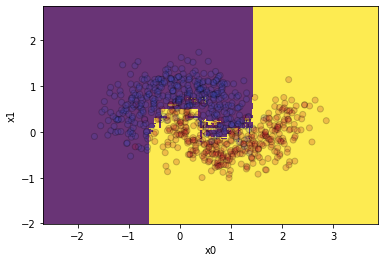

In [103]:
model_lgbm = ltb.LGBMClassifier(num_leaves = 2,max_depth = 1)
model_lgbm.fit(x_train,y_train)
y_pred = model_lgbm.predict(x_test)
acc_lgbm = accuracy_score(y_test, y_pred)
print(acc_lgbm)
disp = DecisionBoundaryDisplay.from_estimator(model_xgb, x_train, response_method="predict",xlabel='x0',alpha = 0.8, ylabel='x1',plot_method = 'pcolormesh',grid_resolution = 500)
disp.ax_.scatter(x_train[:, 0], x_train[:, 1],cmap = 'coolwarm', c=y_train,edgecolor="k",alpha = 0.2)

Question 3.1

In [28]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier

In [29]:
model_bayes = GaussianNB()
model_bayes.fit(x_train,y_train)
y_pred = model_bayes.predict(x_test)
acc_bayes = accuracy_score(y_test, y_pred)
print(acc_bayes)

0.86


Question 3.2

In [39]:
model_vote = VotingClassifier(estimators=[('DTC', model1 ), ('RF', model3), ('ADAB', model_adab),('gnb',model_bayes)], voting='hard')
model_vote.fit(x_train,y_train)
y_pred = model_vote.predict(x_test)
acc_vote_hard = accuracy_score(y_test, y_pred)
print(acc_vote_hard)

0.928


In [40]:
model_vote = VotingClassifier(estimators=[('DTC', model1 ), ('RF', model3), ('ADAB', model_adab),('gnb',model_bayes)], voting='soft')
model_vote.fit(x_train,y_train)
y_pred = model_vote.predict(x_test)
acc_vote_soft = accuracy_score(y_test, y_pred)
print(acc_vote_soft)

0.92


In [43]:
print("The Accuracy of DTC is:",acc_1)
print("The Accuracy of RF is:",acc_3)
print("The Accuracy of ADAB is:",acc_test_ada)
print("The Accuracy of gnb is:",acc_bayes)
print("The Best accuracy for Voting Classifier is:",acc_vote_hard)

The Accuracy of DTC is: 0.916
The Accuracy of RF is: 0.92
The Accuracy of ADAB is: 0.912
The Accuracy of gnb is: 0.86
The Best accuracy for Voting Classifier is: 0.928
